<a href="https://colab.research.google.com/github/asmaa199/data-visualization/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV

# Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Data-cleaning/modified_data.csv')

In [ ]:
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


# Prepare Dataset

In [ ]:
data.shape

(1460, 77)

In [ ]:
data.drop('Id', axis=1, inplace=True)

In [ ]:
data.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


In [ ]:
data.isnull().any()

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

In [ ]:
original_features = list(data.columns)
len(original_features)

76

In [ ]:
features_with_missingValues = list(data.columns[data.isna().any()]) 
len(features_with_missingValues)

15

Filling missing values

In [ ]:
for feature in features_with_missingValues:
  print(feature, ' ',(data[feature].isna().sum())/len(data)*100)

LotFrontage   17.73972602739726
MasVnrType   0.547945205479452
MasVnrArea   0.547945205479452
BsmtQual   2.5342465753424657
BsmtCond   2.5342465753424657
BsmtExposure   2.6027397260273974
BsmtFinType1   2.5342465753424657
BsmtFinType2   2.6027397260273974
Electrical   0.0684931506849315
FireplaceQu   47.26027397260274
GarageType   5.5479452054794525
GarageYrBlt   5.5479452054794525
GarageFinish   5.5479452054794525
GarageQual   5.5479452054794525
GarageCond   5.5479452054794525


In [ ]:
data.dropna(axis=1, thresh=0.5*(len(data)), inplace=True)

In [ ]:
mean_fill =['LotFrontage','MasVnrArea']
bfill = ['FireplaceQu']
ffill = list(set(features_with_missingValues) - set(mean_fill) - set(bfill))

In [ ]:
for feature in mean_fill:
  data[feature].fillna(data[feature].mean(), inplace=True)

In [ ]:
for feature in ffill:
  data[feature].fillna(method='ffill',inplace=True)

In [ ]:
for feature in bfill:
  data[feature].fillna(method='bfill',inplace=True)

In [ ]:
data.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

# Encode the Dataset

In [ ]:
categorical_data = data.select_dtypes(include=['object']).copy()
categorical_data.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
cat_features = list(categorical_data.columns)
cat_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
nominal=['MSZoning','LandContour', 'LotConfig','Neighborhood']
ordinal=list(set(cat_features)-set(nominal))
numerical=list(set(original_features)-set(cat_features))
target=['SalePrice']

In [ ]:
data[nominal]

,MSZoning,LandContour,LotConfig,Neighborhood
0,RL,Lvl,Inside,CollgCr
1,RL,Lvl,FR2,Veenker
2,RL,Lvl,Inside,CollgCr
3,RL,Lvl,Corner,Crawfor
4,RL,Lvl,FR2,NoRidge
...,...,...,...,...
1455,RL,Lvl,Inside,Gilbert
1456,RL,Lvl,Inside,NWAmes
1457,RL,Lvl,Inside,Crawfor
1458,RL,Lvl,Inside,NAmes


In [ ]:
for feature in ordinal:
  data[feature] = (data[feature].astype('category')).cat.codes

In [ ]:
df_nominal = pd.get_dummies(data[nominal])

In [ ]:
df_ordinal = data[ordinal]

In [ ]:
df_numerical = data[numerical]

In [ ]:
encoded_data = pd.concat([df_numerical, df_nominal, df_ordinal], axis=1)
encoded_data.head(2)

,LowQualFinSF,3SsnPorch,GrLivArea,WoodDeckSF,ScreenPorch,YearBuilt,BsmtFinSF2,MoSold,MSSubClass,YearRemodAdd,TotRmsAbvGrd,SalePrice,BsmtFullBath,LotArea,BsmtFinSF1,BsmtHalfBath,Fireplaces,KitchenAbvGr,EnclosedPorch,LotFrontage,MiscVal,YrSold,BedroomAbvGr,GarageYrBlt,GarageCars,FullBath,OverallCond,2ndFlrSF,HalfBath,OpenPorchSF,TotalBsmtSF,GarageArea,OverallQual,MasVnrArea,PoolArea,1stFlrSF,BsmtUnfSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Electrical,Exterior2nd,GarageCond,ExterQual,GarageFinish,Foundation,HouseStyle,GarageQual,Utilities,GarageType,BsmtExposure,KitchenQual,Condition1,PavedDrive,HeatingQC,BsmtCond,Condition2,BsmtFinType2,LandSlope,Street,SaleType,Heating,CentralAir,ExterCond,LotShape,BsmtFinType1,Functional,FireplaceQu,Exterior1st,BsmtQual,BldgType,RoofMatl,RoofStyle,MasVnrType,SaleCondition
0,0,0,1710,0,0,2003,0,2,60,2003,8,208500,1,8450,706,0,0,1,0,65.0,0,2008,3,2003.0,2,2,5,854,1,61,856,548,7,196.0,0,856,150,0,0,0,...,0,0,0,0,0,4,13,4,2,1,2,5,4,0,1,3,2,2,2,0,3,2,5,0,1,8,1,1,4,3,2,6,4,12,2,0,1,1,1,4
1,0,0,1262,298,0,1976,0,5,20,1976,6,181500,0,9600,978,1,1,1,0,80.0,0,2007,3,1976.0,2,2,8,0,0,0,1262,460,6,0.0,0,1262,284,0,0,0,...,0,0,0,0,1,4,8,4,3,1,1,2,4,0,1,1,3,1,2,0,3,2,5,0,1,8,1,1,4,3,0,6,4,8,2,0,1,1,2,4


In [ ]:
encoded_data.shape

(1460, 111)

# Data Normalization

In [ ]:
encoded_data[target]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
X=encoded_data.drop('SalePrice',axis=1)

In [ ]:
y = data[target]
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
X=X.to_numpy()
X

array([[0.000e+00, 0.000e+00, 1.710e+03, ..., 1.000e+00, 1.000e+00,
        4.000e+00],
       [0.000e+00, 0.000e+00, 1.262e+03, ..., 1.000e+00, 2.000e+00,
        4.000e+00],
       [0.000e+00, 0.000e+00, 1.786e+03, ..., 1.000e+00, 1.000e+00,
        4.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 2.340e+03, ..., 1.000e+00, 2.000e+00,
        4.000e+00],
       [0.000e+00, 0.000e+00, 1.078e+03, ..., 3.000e+00, 2.000e+00,
        4.000e+00],
       [0.000e+00, 0.000e+00, 1.256e+03, ..., 1.000e+00, 2.000e+00,
        4.000e+00]])

In [ ]:
X=StandardScaler().fit_transform(X)
X[0]

array([-0.20695153,  0.02607349])

In [ ]:
y=y.to_numpy()
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [ ]:
y=StandardScaler().fit_transform(y)
y[0]

array([0.34727322])

In [ ]:
X.shape

(1460, 2)

In [ ]:
y.shape

(1460, 1)

# PCA Dimensionality Reduction

In [ ]:
pca = PCA(n_components=2)
p_components=pca.fit_transform(X)
p_components

array([[-2065.54225474,    18.45079413],
       [ -912.04070171,   -10.37921011],
       [  734.16130803,    86.82251634],
       ...,
       [-1458.10445913,   643.99794415],
       [ -809.8757062 ,  -633.73961637],
       [ -576.0145494 ,  -113.95005607]])

In [ ]:
pca.explained_variance_ratio_

array([0.98479217, 0.00495046])

# Visualization **optional**

In [ ]:
pca_data = pd.DataFrame(p_components,columns=['PC1', 'PC2'])
target_data = pd.DataFrame(y, columns=['SalePrice'])
final_data = pd.concat([pca_data,target_data], axis=1)
final_data

,PC1,PC2,SalePrice
0,-2065.542255,18.450794,208500
1,-912.040702,-10.379210,181500
2,734.161308,86.822516,223500
3,-970.840554,-54.411055,140000
4,3757.977049,638.414615,250000
...,...,...,...
1455,-2605.117348,43.644982,175000
1456,2684.762062,940.507246,210000
1457,-1458.104459,643.997944,266500
1458,-809.875706,-633.739616,142125


In [ ]:
X=p_components
X

array([[-2065.54225474,    18.45079413],
       [ -912.04070171,   -10.37921011],
       [  734.16130803,    86.82251634],
       ...,
       [-1458.10445913,   643.99794415],
       [ -809.8757062 ,  -633.73961637],
       [ -576.0145494 ,  -113.95005607]])

# Train a Single Model

In [ ]:
regressor = LassoCV()

In [ ]:
#fitting
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
regressor.coef_

array([0.2585778 , 0.73997909])

In [ ]:
regressor.intercept_

1.371687896770779e-16

# Example plot

In [ ]:
final_data_array = final_data.to_numpy()

In [ ]:
min_val = np.min(final_data_array, axis=0)
max_val = np.max(final_data_array, axis=0)
X_plot, Y_plot = np.meshgrid(np.linspace(min_val[0], max_val[0], 20), np.linspace(min_val[1], max_val[1], 20))

In [ ]:
w1 = regressor.coef_[0]
w2 = regressor.coef_[1]
b = regressor.intercept_
z_plot = w1*X_plot + w2*Y_plot + b

In [ ]:
w2

0.7399790889703736

Text(0.5, 0.92, 'Plane of Best Fit')

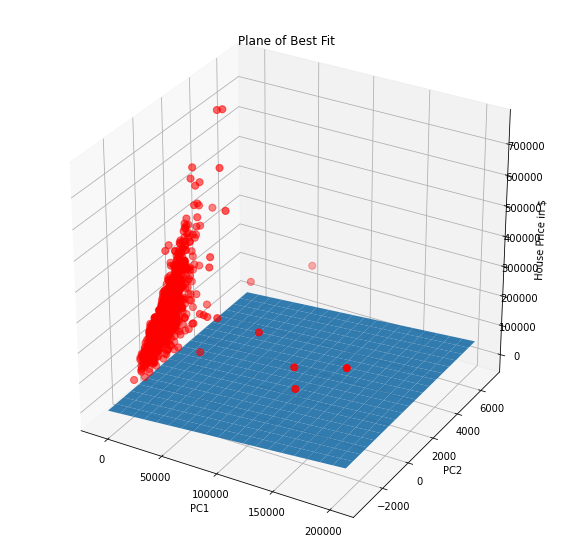

In [ ]:
fig1 = plt.figure(figsize=(10,10))
ax = fig1.gca(projection='3d')
ax.plot_surface(X_plot,Y_plot,z_plot,rstride=1,cstride=1,alpha=0.9)
ax.scatter(final_data_array[:,0],final_data_array[:,1],final_data_array[:,2],c='r',s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('House Price in $')
ax.set_title('Plane of Best Fit')